## Week 11 Homework (9)

### Q1: copulas

1. ~~Use the example copula code below to provide posterior inference on the dependency structure between for **your own non normally distributed data that you find**~~
2. Repeat the exercise using instead a two pass approach in the manner of https://www.pymc.io/projects/examples/en/latest/howto/copula-estimation.html
3. Describe what a copula is and how the two verions of code implement it 
4. Describe how to use this to create arbitrary multivariate GLM regressions

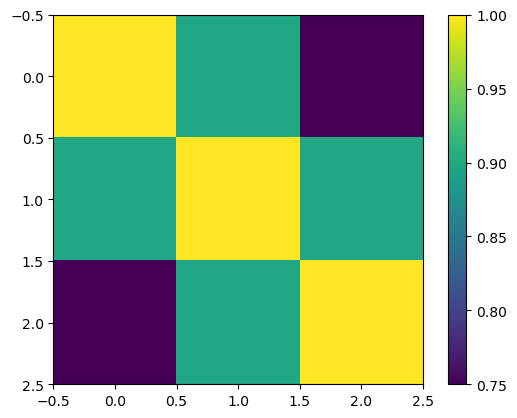

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

p = 3
#Psi = np.eye(p)
#a_cov = stats.invwishart(df=p+2, scale=Psi).rvs()
a_cor = (np.ones((p,p))*9+np.diag((1,1,1)))/10
a_cor[0,-1] -= 0.15
a_cor[-1,0] -= 0.15

n = 100
x = stats.multivariate_normal(mean=np.zeros(p), cov=a_cor).rvs(size=n)
plt.imshow(a_cor)
plt.colorbar();

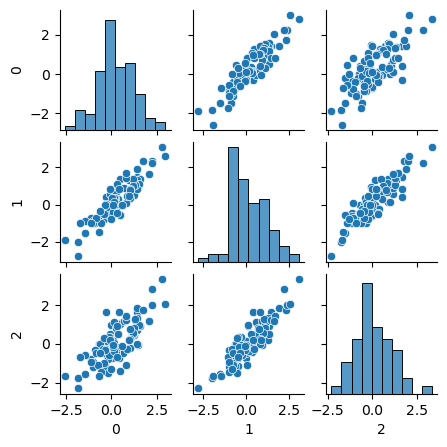

In [2]:
import seaborn
import pandas as pd
seaborn.pairplot(pd.DataFrame(x),height=1.5);

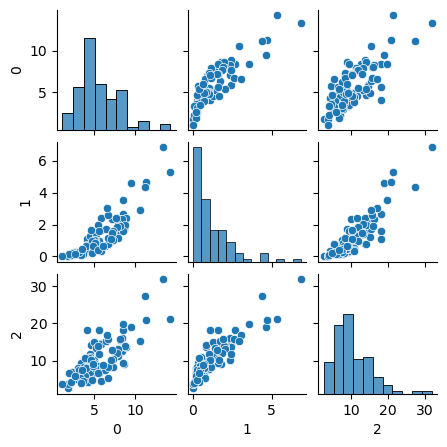

In [3]:
y = x.copy()
y[:,0] = stats.gamma(a=5).ppf(stats.norm().cdf(x[:,0]))
y[:,1] = stats.expon(scale=1).ppf(stats.norm().cdf(x[:,1]))
y[:,2] = stats.chi2(df=10).ppf(stats.norm().cdf(x[:,2]))

seaborn.pairplot(pd.DataFrame(y),height=1.5);

In [4]:
import pymc as pm
import arviz as az

with pm.Model() as copula:

    p0 = pm.HalfNormal('p0', sigma=10)
    y0 = pm.Gamma('y0', alpha=p0, beta=1, observed=y[:,0:1])

    y0_ = pm.Deterministic('y0_', pm.Normal.icdf( 
              pm.math.exp(pm.logcdf(pm.Gamma.dist(alpha=p0, beta=1), y0)), 
                                                    mu=0, sigma=1))

    p1 = pm.HalfNormal('p1', sigma=10)
    y1 = pm.Exponential('y1', lam=p1, observed=y[:,1:2])

    y1_ = pm.Deterministic('y1_', pm.Normal.icdf( 
              pm.math.exp(pm.Exponential.logcdf(y1, mu=p1)),
                                                    mu=0, sigma=1))

    p2 = pm.HalfNormal('p2', sigma=10)
    y2 = pm.ChiSquared('y2', nu=p2, observed=y[:,2:3])
    y2_ = pm.Deterministic('y2_', pm.Normal.icdf(
              pm.math.exp(pm.logcdf(pm.ChiSquared.dist(nu=p2), y2)),
                                                   mu=0, sigma=1))

    L,R,stds = pm.LKJCholeskyCov("R", n=3, eta=2.0,
                      sd_dist=pm.Exponential.dist(1.0, shape=3),
                      compute_corr=True)

    potential = pm.Potential("MVNeval", pm.logp(pm.MvNormal.dist(mu=0, cov=R), pm.math.concatenate([y0_,y1_,y2_], axis=1)))

    idata = pm.sample(1000, tune=1000, chains=2)

<<!! BUG IN FGRAPH.REPLACE OR A LISTENER !!>> <class 'TypeError'> The type of the replacement (Matrix(bool, shape=(1, 1))) must be compatible with the type of the original Variable (Matrix(bool, shape=(100, 1))). local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): node: And(Lt.0, [[False] [ ... ] [False]])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python

ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 571, in replace_all_validate
    fgraph.replace(r, new_r, reason=reason, verbose=False, **kwargs)
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/fg.py", line 508, in replace
    self.change_node_input(
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/fg.py", line 428, in change_node_input
    raise TypeError(
TypeError: The type of the replacement (Matrix(bool, shape=(1, 

<<!! BUG IN FGRAPH.REPLACE OR A LISTENER !!>> <class 'TypeError'> The type of the replacement (Matrix(bool, shape=(1, 1))) must be compatible with the type of the original Variable (Matrix(bool, shape=(100, 1))). local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): node: And(Lt.0, [[False] [ ... ] [False]])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python

ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 571, in replace_all_validate
    fgraph.replace(r, new_r, reason=reason, verbose=False, **kwargs)
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/fg.py", line 508, in replace
    self.change_node_input(
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/fg.py", line 428, in change_node_input
    raise TypeError(
TypeError: The type of the replacement (Matrix(bool, shape=(1, 

<<!! BUG IN FGRAPH.REPLACE OR A LISTENER !!>> <class 'TypeError'> The type of the replacement (Matrix(bool, shape=(1, 1))) must be compatible with the type of the original Variable (Matrix(bool, shape=(100, 1))). local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): node: And(Lt.0, [[False] [ ... ] [False]])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python

<<!! BUG IN FGRAPH.REPLACE OR A LISTENER !!>> <class 'TypeError'> The type of the replacement (Matrix(bool, shape=(1, 1))) must be compatible with the type of the original Variable (Matrix(bool, shape=(100, 1))). local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): node: And(Lt.0, [[False] [ ... ] [False]])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python

ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 571, in replace_all_validate
    fgraph.replace(r, new_r, reason=reason, verbose=False, **kwargs)
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/fg.py", line 508, in replace
    self.change_node_input(
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/fg.py", line 428, in change_node_input
    raise TypeError(
TypeError: The type of the replacement (Matrix(bool, shape=(1, 

<<!! BUG IN FGRAPH.REPLACE OR A LISTENER !!>> <class 'TypeError'> The type of the replacement (Matrix(bool, shape=(1, 1))) must be compatible with the type of the original Variable (Matrix(bool, shape=(100, 1))). local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): node: And(Lt.0, [[False] [ ... ] [False]])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python

ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 571, in replace_all_validate
    fgraph.replace(r, new_r, reason=reason, verbose=False, **kwargs)
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/fg.py", line 508, in replace
    self.change_node_input(
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/fg.py", line 428, in change_node_input
    raise TypeError(
TypeError: The type of the replacement (Matrix(bool, shape=(1, 

/opt/conda/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:701: UserWarning: Optimization Warning: The Op erfcinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [p0, p1, p2, R]


/opt/conda/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:701: UserWarning: Optimization Warning: The Op erfcinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
/opt/conda/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:701: UserWarning: Optimization Warning: The Op erfcinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
/opt/conda/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:701: UserWarning: Optimization Warning: The Op erfcinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
/opt/conda/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:701: UserWarning: Optimization Warning: The Op erfcinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
Sampling 2 chains fo

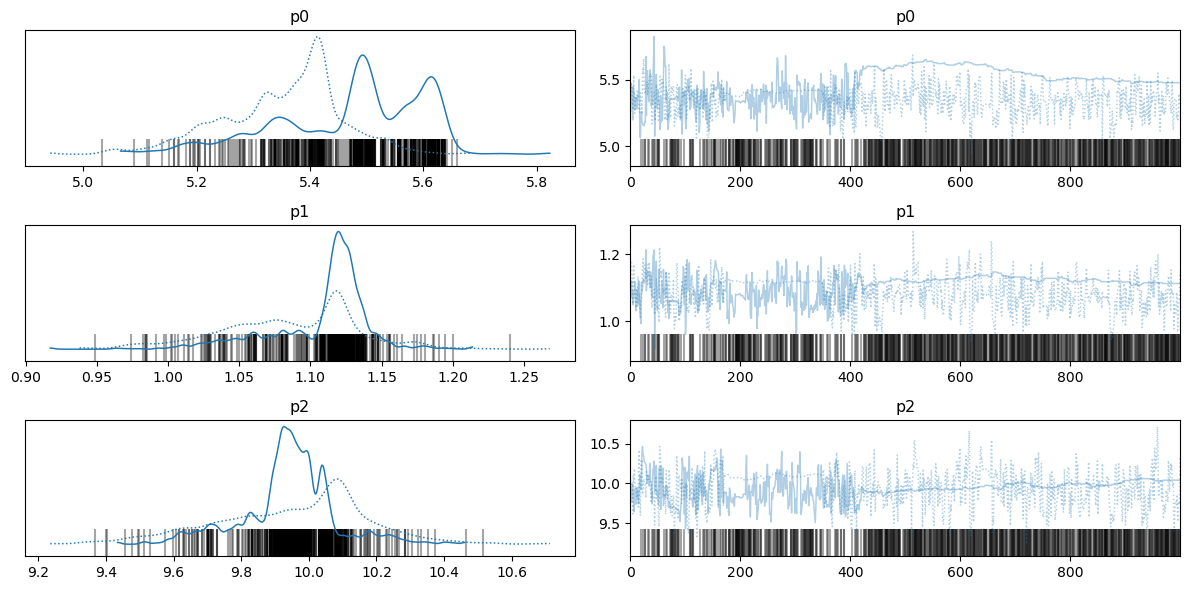

In [5]:
# Estimation is essentially correct
az.plot_trace(idata, var_names=['p0','p1','p2'])
plt.tight_layout()

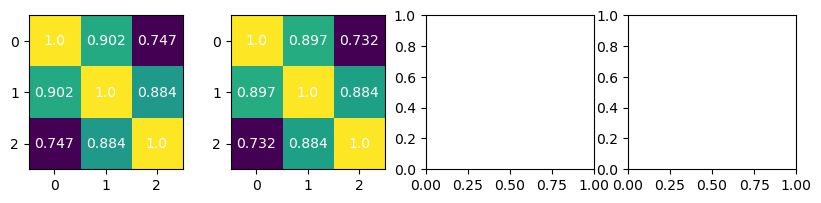

In [6]:
# Estimation is essentially correct
fig,ax = plt.subplots(1,4,figsize=(10,2))
for i,c in enumerate(list(idata.posterior['R_corr'].values.mean(axis=1))):
    ax[i].imshow(c)
    for k in range(3):
        for j in range(3):
            ax[i].text(j,k,s=str(round(c[j,k],3)), 
                       color='w', va='center', ha='center')

In [7]:
# 2.
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

In [8]:
# Define marginal fitting function

def fit_and_transform_marginal(data, dist_name):
    with pm.Model() as model:
        if dist_name == "gamma":
            alpha = pm.HalfNormal("alpha", sigma=10)
            beta = pm.HalfNormal("beta", sigma=10)
            pm.Gamma("obs", alpha=alpha, beta=beta, observed=data)
        elif dist_name == "exponential":
            lam = pm.HalfNormal("lam", sigma=10)
            pm.Exponential("obs", lam, observed=data)
        elif dist_name == "chi2":
            nu = pm.HalfNormal("nu", sigma=10)
            pm.ChiSquared("obs", nu=nu, observed=data)

        trace = pm.sample(1000, tune=1000, chains=2, progressbar=True)

    means = {var: trace.posterior[var].mean().item() for var in trace.posterior.data_vars}
    if dist_name == "gamma":
        return stats.gamma.cdf(data, a=means["alpha"], scale=1/means["beta"])
    elif dist_name == "exponential":
        return stats.expon.cdf(data, scale=1/means["lam"])
    elif dist_name == "chi2":
        return stats.chi2.cdf(data, df=means["nu"])

In [9]:
## (2)Fit Dependency Structure via Copula
# Transform to standard normal space
df_y = pd.DataFrame(y, columns=["gamma_like", "expo_like", "chi2_like"])

Z = np.column_stack([
    stats.norm.ppf(fit_and_transform_marginal(df_y[col].values, dist))
    for col, dist in zip(["gamma_like", "expo_like", "chi2_like"], ["gamma", "exponential", "chi2"])
])

# Fit Gaussian copula in PyMC
with pm.Model() as copula_model:
    chol_dist = pm.LKJCholeskyCov('chol_cov', n=3, eta=2, sd_dist=pm.HalfNormal.dist(1.0))
    chol, corr, sigmas = chol_dist
    cov = pm.Deterministic("cov", chol @ chol.T)
    pm.MvNormal("obs", mu=np.zeros(3), chol=chol, observed=Z)
    copula_trace = pm.sample(1000, tune=1000, chains=2, target_accept=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [alpha, beta]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [lam]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [nu]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [chol_cov]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 41 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


SubQ1.3. Describe what a copula is and how the two verions of code implement it.
SubQ1.4. Describe how to use this to create arbitrary multivariate GLM regressions

- A copula is a multivariate distribution defined over the unit cube [0,1]^p that allows us to model the dependency structure among random variables separately from their marginal distributions. 
The separation between marginals and dependence allows for great modeling flexibility. In a one-step (joint) modeling approach, marginals and their correlation are estimated simultaneously. In contrast, the two-step method used above first fits each marginal distribution separately, transforms data to a common scale (such as the standard normal), and then models the correlation structure via a Gaussian copula using a prior such as LKJ.

This separation makes it easier to use different types of response variables (e.g., continuous, count, skewed) within a multivariate framework.

- To build a multivariate model where each response has its own marginal distribution and covariates, but the joint structure is captured via a copula:

Approach 1: One-Pass GLM + Copula (Theoretically Ideal)

- Model each Y_i ~ GLM(X_i, beta_i)

- Use the GLM outputs to define likelihoods and jointly infer marginals and dependence structure (e.g., via Gaussian copula)

- Full posterior inference allows uncertainty in covariates, marginal parameters, and dependency

Approach 2: Two-Pass GLM + Copula (PyMC Style)

- Fit each GLM(Y_i | X_i) independently and get posterior predictive CDF F_i

- Transform Y_i to uniform space using F_i, then to Z_i = $\Phi^{-1}(F_i(Y_i))$

- Fit multivariate normal on Z_i with LKJ prior

The one-pass approach most fully explores parameter uncertainty and provides joint inference. It is the gold standard theoretically, even if slower computationally. The two-pass approach is practical and widely used.



### Q2: Variable Selection using Spike and Slab

Perform multivarite regression (or multivariate probit classification) with spike and slab variable selection priors and compare inference to analagous inference with diffuse normal priors (imposing minimal L2 style regularization on the likelihood).

You may artificially limit the size of your data to reduce the computational demands, but if you do so, discuss the behavior of the computational demands with respect to the number of observations $n$, the number of random variables $m$ making up the multivariate observations, and the number of columns of the design matrix $p$.



In [10]:
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# Simulate synthetic data
np.random.seed(123)
n_samples = 100
d_features = 10
k_outputs = 3

X_data = np.random.normal(0, 1, (n_samples, d_features))
true_coefs = np.zeros((d_features, k_outputs))
true_coefs[1, 0] = 2.0
true_coefs[3, 1] = -3.0
true_coefs[5, 2] = 1.5
Y_data = X_data @ true_coefs + np.random.normal(0, 1, (n_samples, k_outputs))

# Spike-and-Slab Prior Model
with pm.Model() as spike_slab_model:
    # Variable inclusion indicator (spike)
    gamma = pm.Bernoulli("gamma", p=0.5, shape=(d_features, k_outputs))
    
    # Slab weights
    slab = pm.Normal("slab", mu=0, sigma=10, shape=(d_features, k_outputs))
    
    # Effective weights: 0 if not included
    beta_ss = pm.Deterministic("beta_ss", gamma * slab)
    
    # Observation noise
    sigma_ss = pm.HalfNormal("sigma_ss", sigma=1, shape=k_outputs)
    
    # Predicted mean
    mu_ss = pm.math.dot(X_data, beta_ss)
    
    # Likelihood
    pm.Normal("Y_obs_ss", mu=mu_ss, sigma=sigma_ss, observed=Y_data)
    
    # Sampling
    idata_spike = pm.sample(1000, tune=1000, cores=1, random_seed=123)

# Diffuse Normal Prior Model
with pm.Model() as diffuse_model:
    beta_diffuse = pm.Normal("beta_diffuse", mu=0, sigma=1000, shape=(d_features, k_outputs))
    sigma_diffuse = pm.HalfNormal("sigma_diffuse", sigma=1, shape=k_outputs)
    mu_diffuse = pm.math.dot(X_data, beta_diffuse)
    pm.Normal("Y_obs_diffuse", mu=mu_diffuse, sigma=sigma_diffuse, observed=Y_data)
    
    idata_diffuse = pm.sample(1000, tune=1000, cores=1, random_seed=123)



Sequential sampling (2 chains in 1 job)
CompoundStep
>BinaryGibbsMetropolis: [gamma]
>NUTS: [slab, sigma_ss]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 74 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta_diffuse, sigma_diffuse]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 4 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


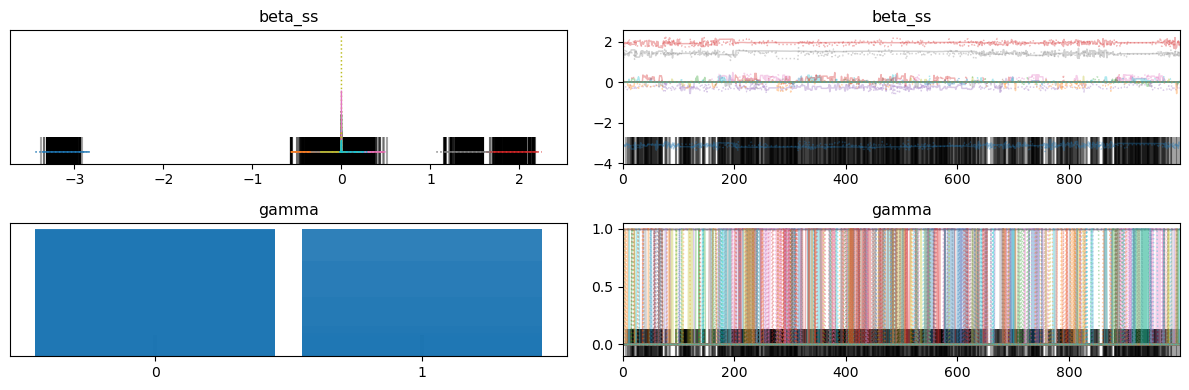

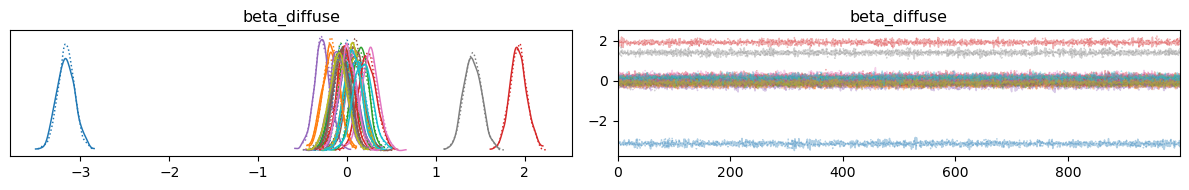

In [11]:
# Posterior Visualization
az.plot_trace(idata_spike, var_names=["beta_ss", "gamma"])
plt.tight_layout()
plt.show()

az.plot_trace(idata_diffuse, var_names=["beta_diffuse"])
plt.tight_layout()
plt.show()

### Q3 Variable Selection

Perform multivarite regression (or multivariate probit classification) with the horseshoe variable selection prior and compare inference to analagous inference with spike and slab priors.

The horseshoe variable selection prior is introduced here
- https://www.pymc.io/projects/docs/en/v5.6.0/learn/core_notebooks/pymc_overview.html
- and searches for "horseshoe prior pymc" on google produce additional examples



### The Horseshoe prior

The [PyMC overview](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html) and [many](https://www.google.com/search?q=pymc+horseshoe&oq=pymc+horseshoe) other [resources](https://mellorjc.github.io/HorseshoePriorswithpymc3.html) provide ***Horseshoe prior*** [[1]](https://www.jstor.org/stable/25734098) [[2]](https://faculty.mccombs.utexas.edu/carlos.carvalho/Carvalhoetal2009.pdf) implementations 

| Half-Cauchy $\text{HC}_+(\xi)$ | Horseshoe Prior $\text{HSP}$ | Shrinkage $\kappa$ | Change of Variables|
|:-:|:-:|:-:|:-:|
|$$f(x \mid \xi) = \frac{2\cdot 1_{[x>=0]}(x)}{\pi \xi \left[1 + \left(\frac{x}{\xi}\right)^2\right]}$$|\begin{align*}w_i|\tau &\sim N(0, \sigma^{2}=\lambda_i^2\tau^2)\\\lambda_i &\sim HC_+(1)\\\tau &\sim HC_+(\tau_0)\end{align*}|\begin{align*}\kappa_{\lambda_i} ={}& 1/(1+\lambda_i^2)\\\lambda_i ={}& \sqrt{1/\kappa_{\lambda_i}-1}\\J_{\kappa_{\lambda_i}} ={}& \frac{1}{2}(\kappa_{\lambda_i}^{-1}-1)^{-\frac{1}{2}}\times \kappa_{\lambda_i}^{-2} \end{align*}|\begin{align*}f(\kappa_{\lambda_i}) = {} & f\left(\lambda_i = \sqrt{1/\kappa_{\lambda_i}-1}\right)\\ {} & \times \underbrace{\frac{1}{2}(\kappa_{\lambda_i}^{-1}-1)^{-\frac{1}{2}}\times \kappa_{\lambda_i}^{-2}}_{J_{\kappa_{\lambda_i}}} \end{align*}|



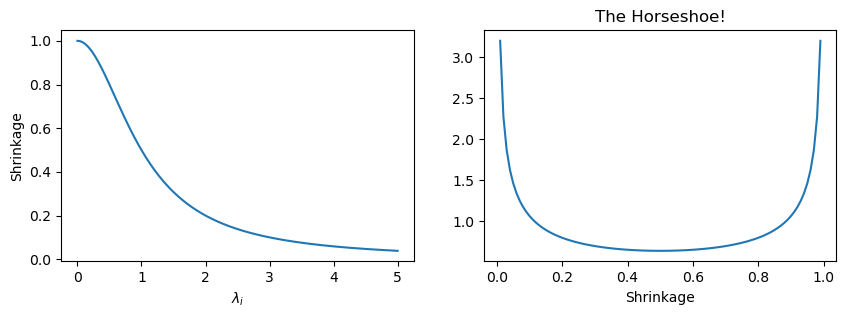

In [12]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
support = np.linspace(0,5,1000)
# shrnk = trans(spprt) = 1/(1+sprt**2)
shrinkage = 1/(1+support**2)
ax[0].plot(support, shrinkage)
ax[0].set_ylabel("Shrinkage")
ax[0].set_xlabel("$\\lambda_i$") 
# change of variables: 
# spprt = (1/shrnk-1)**0.5; E.g., 1/(1+.5**2), (1/.8-1)**0.5;
# jacobian: .5(1/shrnk-1)**(-.5)*shrnk**(-2)
shrinkage = np.linspace(0.01,.99,99)
ax[1].plot(shrinkage, 
           stats.halfcauchy(scale=1).pdf((1/shrinkage-1)**0.5) * 
           .5*(1/shrinkage-1)**(-.5)*shrinkage**(-2))
ax[1].set_title('The Horseshoe!')
ax[1].set_xlabel("Shrinkage");

In [13]:
# Re-simulate data
np.random.seed(123)
n_samples = 100
p = 10
m = 3
X = np.random.normal(0, 1, (n_samples, p))
true_coefs = np.zeros((p, m))
true_coefs[1, 0] = 2.0
true_coefs[3, 1] = -3.0
true_coefs[5, 2] = 1.5
Y = X @ true_coefs + np.random.normal(0, 1, (n_samples, m))


# Spike-and-Slab Model (Q2)
with pm.Model() as spike_slab_model:
    gamma = pm.Bernoulli('gamma', p=0.5, shape=(p, m))
    b_slab = pm.Normal('b_slab', mu=0, sigma=10, shape=(p, m))
    beta_ss = pm.Deterministic('beta_ss', gamma * b_slab)

    sigma_ss = pm.HalfNormal('sigma_ss', sigma=1, shape=m)
    mu_ss = pm.math.dot(X, beta_ss)
    pm.Normal('Y_obs_ss', mu=mu_ss, sigma=sigma_ss, observed=Y)

    idata_ss = pm.sample(1000, tune=1000, init="adapt_diag", cores=1, random_seed=123)


# Horseshoe Model 
with pm.Model() as horseshoe_model:
    lam = pm.HalfCauchy("lam", beta=1, shape=(p, m))
    tau = pm.HalfCauchy("tau", beta=1)
    hs_sigma = pm.Deterministic("hs_sigma", tau * lam)

    beta_hs = pm.Normal("beta_hs", mu=0, sigma=hs_sigma, shape=(p, m))

    sigma_hs = pm.HalfNormal("sigma_hs", sigma=1, shape=m)
    mu_hs = pm.math.dot(X, beta_hs)
    pm.Normal("Y_obs_hs", mu=mu_hs, sigma=sigma_hs, observed=Y)

    idata_hs = pm.sample(1000, tune=1000, init="adapt_diag", cores=1, random_seed=123)


Sequential sampling (2 chains in 1 job)
CompoundStep
>BinaryGibbsMetropolis: [gamma]
>NUTS: [b_slab, sigma_ss]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 74 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [lam, tau, beta_hs, sigma_hs]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 54 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


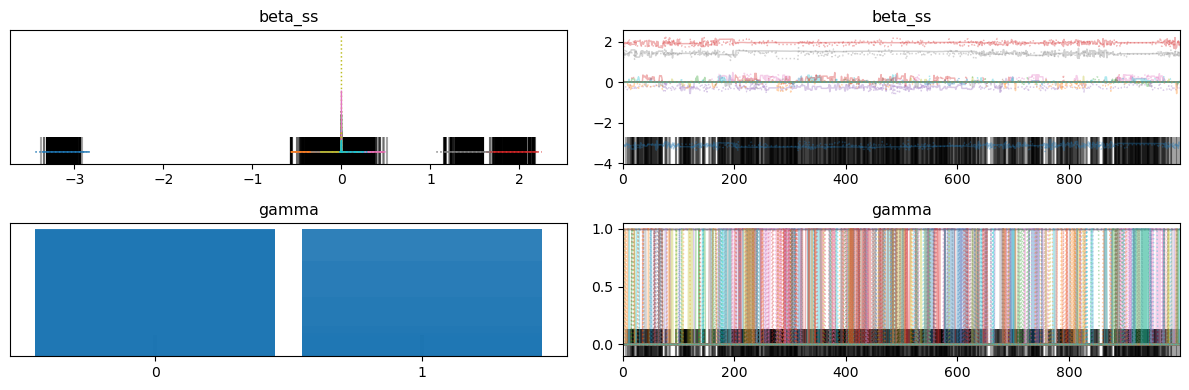

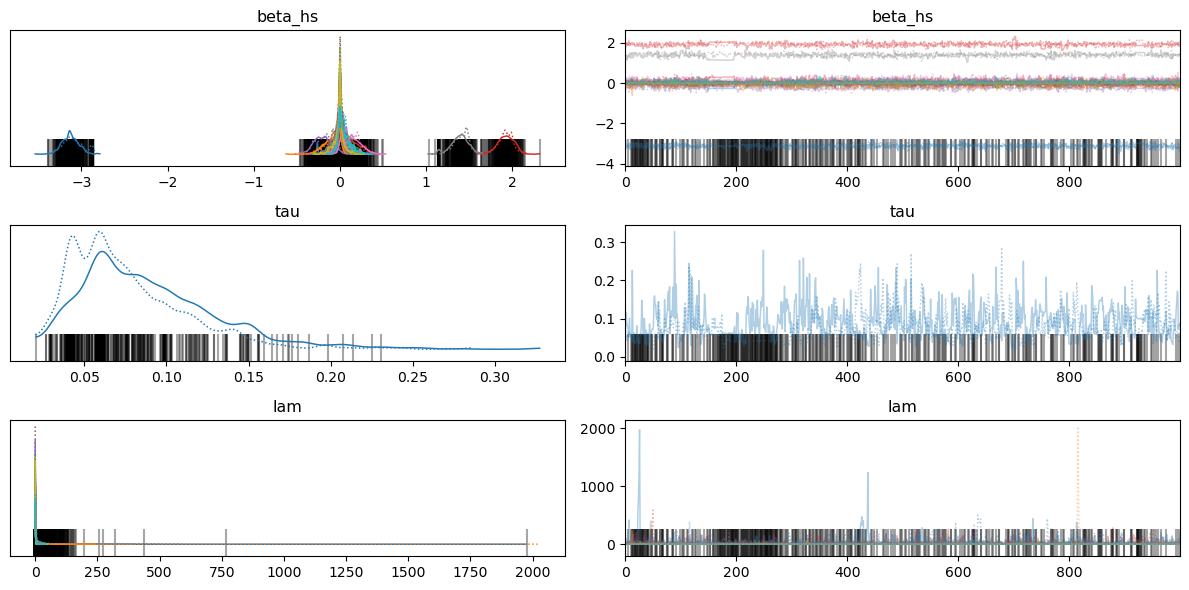

In [14]:
# Posterior Trace Comparison
az.plot_trace(idata_ss, var_names=['beta_ss', 'gamma'])
plt.tight_layout()
plt.show()

az.plot_trace(idata_hs, var_names=['beta_hs', 'tau', 'lam'])
plt.tight_layout()
plt.show()
